# Creating a CNN to Classify Cursive Hiragana using the Kuzushiji-MNIST Dataset

### Setting Imports

In [8]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
import matplotlib.pyplot as plt
%matplotlib inline

### Setting Config Variables

In [9]:
batch_size = 128
num_classes = 49
epochs = 12
img_rows, img_cols = 28, 28

def load(f):
    return np.load(f)['arr_0']

### Loading in the dataset
I am using the KMNIST dataset found here: https://github.com/rois-codh/kmnist

Specifically, I am using the Kuzushiji-49 dataset which contains all 48 Hiragana characters and one iteration mark.

In [47]:
x_train = load('../dataset/k49-train-imgs.npz')
x_test = load('../dataset/k49-test-imgs.npz')
y_train = load('../dataset/k49-train-labels.npz')
y_test = load('../dataset/k49-test-labels.npz')

### Exploring the dataset

In [43]:
print("Training Images:", x_train.shape[0])
print("Training Labels:", y_train.shape[0])
print("Testing Images:", x_test.shape[0])
print("Testing Labels:", y_test.shape[0])
print("Total Classes:", y_train.shape[1])

Training Images: 232365
Training Labels: 232365
Testing Images: 38547
Testing Labels: 38547
Total Classes: 49


In [44]:
character_map = pd.read_csv("../dataset/k49_classmap.csv", encoding="utf-8")
character_map

,index,codepoint,char
0,0,U+3042,あ
1,1,U+3044,い
2,2,U+3046,う
3,3,U+3048,え
4,4,U+304A,お
5,5,U+304B,か
6,6,U+304D,き
7,7,U+304F,く
8,8,U+3051,け
9,9,U+3053,こ


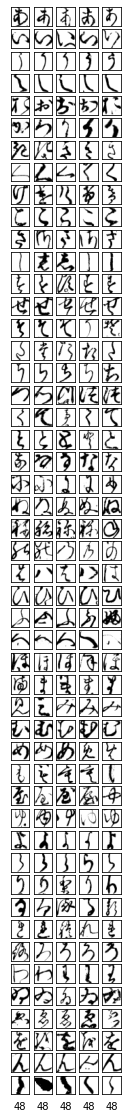

In [66]:

plt.figure(figsize=(20, 20))

for i in range(49):
    imgs = x_test[np.where(y_test == i)]
    cls = y_test[np.where(y_test == i)]
    for j in range(5):
        plt.subplot(49, 49, i * 49 + j + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(imgs[j], cmap=plt.cm.binary)
        plt.xlabel(cls[j])

### Assigning Test and Train data

In [11]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

### Formatting and Normalizing the image data

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(f'{len(x_train)} train samples, {len(x_test)} test samples')

232365 train samples, 38547 test samples


### Converting the class vectors to binary matrices

In [13]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

### Creating the layers of our CNN

In [18]:
# Convolutional layers to create feature mapping
# Convolves image data using 32 3x3 filters
layer1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)
# Convolves image data again using 64 filters
layer2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')

# Pooling layer to reduce convolved dimensionality by selecting the max values from 2x2 matrices
layer3 = MaxPooling2D(pool_size=(2, 2))

# Dropout layer to improve signal retention and reduce noise expression
layer4 = Dropout(0.25)

# Flattening layer to compress the feature map into single vectors for ingestion
layer5 = Flatten()

# Connective Dense layers to provide the input and output for our neural network
layer6 = Dense(128, activation='relu')
layer7 = Dropout(0.5)
layer8 = Dense(49, activation='softmax')

In [19]:
# Add layers to our model

# Initialize sequential model schema
model = Sequential()

# Add in our layers one by one
model.add(layer1)
model.add(layer2)
model.add(layer3)
model.add(layer4)
model.add(layer5)
model.add(layer6)
model.add(layer7)
model.add(layer8)

# Show summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

### Compiling and training our model using the Adam optimizer

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/12
1816/1816 [==============================] - 219s 120ms/step - loss: 0.9446 - accuracy: 0.7495 - val_loss: 0.6484 - val_accuracy: 0.8275
Epoch 2/12
1816/1816 [==============================] - 244s 134ms/step - loss: 0.5191 - accuracy: 0.8570 - val_loss: 0.4903 - val_accuracy: 0.8700
Epoch 3/12
1816/1816 [==============================] - 225s 124ms/step - loss: 0.4198 - accuracy: 0.8829 - val_loss: 0.4194 - val_accuracy: 0.8893
Epoch 4/12
1816/1816 [==============================] - 204s 112ms/step - loss: 0.3588 - accuracy: 0.8987 - val_loss: 0.3929 - val_accuracy: 0.8967
Epoch 5/12
1816/1816 [==============================] - 212s 117ms/step - loss: 0.3224 - accuracy: 0.9072 - val_loss: 0.3672 - val_accuracy: 0.9047
Epoch 6/12
1816/1816 [==============================] - 217s 120ms/step - loss: 0.2922 - accuracy: 0.9160 - val_loss: 0.3565 - val_accuracy: 0.9074
Epoch 7/12
1816/1816 [==============================] - 219s 121ms/step - loss: 0.2728 - accuracy: 0.9206 - val_

### Visualize results of the model training using `matplotlib`

In [22]:
def plot_training_results(history):
    """
    The visualization will include charts for accuracy and loss, 
    on the training and as well as validation data sets.
    """
    # Get accuracy for training and validation sets
    accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']

    # Get loss for training and validation sets
    loss = history.history['loss']
    validation_loss = history.history['val_loss']

    # Get range of epochs to produce common plotting range
    epochs_range = range(12)

    # Instantiate plotting figure space
    plt.figure(figsize=(20, 8))

    # Create training/validation accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    # Create training/validation loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, validation_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    # Render visualization
    plt.show()

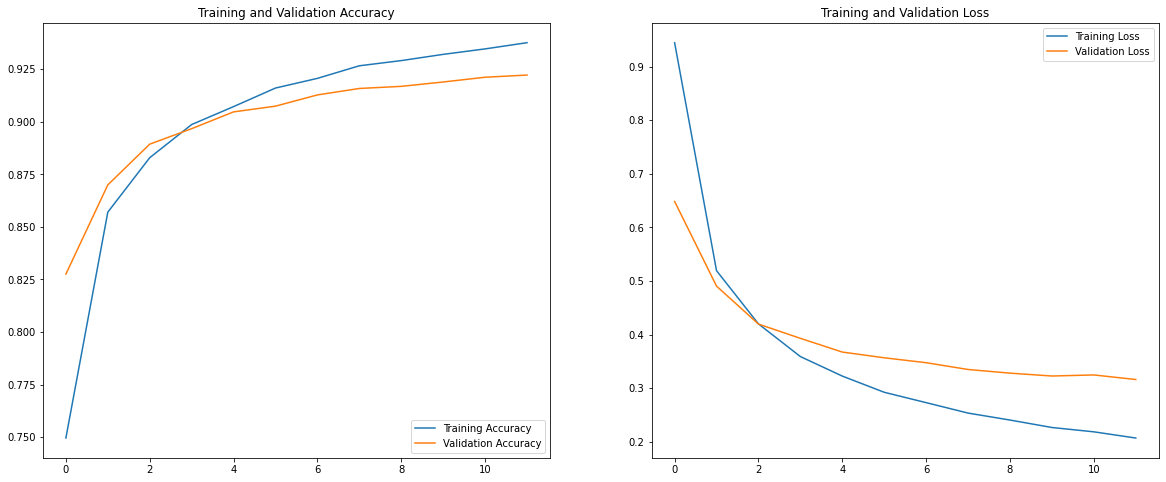

In [23]:
plot_training_results(history)

### Calculating balanced accuracy as suggested by the creators of KMNIST

In [36]:
p_test = model.predict(x_test)
p_test = np.argmax(p_test, axis=1)
y_test_balanced = load('../dataset/k49-test-labels.npz')

In [38]:
accs = []
for cls in range(49):
  mask = (y_test_balanced == cls)
  cls_acc = (p_test == cls)[mask].mean() # Accuracy for rows of class cls
  accs.append(cls_acc)

accs = np.mean(accs) # Final balanced accuracy
print(accs)

0.9134118361477944


We're getting about **91%** accuracy accross all 49 classes of the KMNIST dataset.

### Saving the model for use in a production deployment

In [39]:
def save_model(model, file_name, save_format):
    """ 
    Save the model weights and architecture.
    
    Parameters: 
       model(Model): keras Model object being saved
       file_name(str): name of the Hadoop file where
                       the whole model will be saved
       save_format(str): Indicates whether to save the model to the default
                         SavedModel('tf'), or HDF5('h5'), or 
                         use both H5 and JSON ('composite') formats. 
       Returns: None
    """
    MODEL_DIRECTORY = "../model"
    def __save_as_composite():
      """ Saving the model as H5 (for params) + JSON (for the architecture) """
      # Save the weights
      model.save_weights(f'{MODEL_DIRECTORY}/{file_name}_params.h5')
      # Save the architecture
      with open(f'{MODEL_DIRECTORY}/{file_name}_layers.json', 'w') as f:
          f.write(model.to_json())
    
    def __save_as_h5():
      """ Option 2: Saving whole model as a single H5 file (more storage) """
      model.save(f"{MODEL_DIRECTORY}/{file_name}.h5", save_format=save_format)

    # Call the appropiate save func
    if save_format == 'h5':
      __save_as_h5()
    elif save_format == 'composite':
      __save_as_composite()
    else:  # save as a SavedModel
      model.save(file_name)

In [40]:
save_model(model, "kmnist_classifier", "h5")